In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
#导入数据
data = pd.read_csv("boston.csv")

In [4]:
#数据分布
data.describe(include='all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647422,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#数据具体内容
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
#定义自变量
x1 = ['crim','rm','lstat']
features = data[x1].values
features

array([[6.3200e-03, 6.5750e+00, 4.9800e+00],
       [2.7310e-02, 6.4210e+00, 9.1400e+00],
       [2.7290e-02, 7.1850e+00, 4.0300e+00],
       ...,
       [6.0760e-02, 6.9760e+00, 5.6400e+00],
       [1.0959e-01, 6.7940e+00, 6.4800e+00],
       [4.7410e-02, 6.0300e+00, 7.8800e+00]])

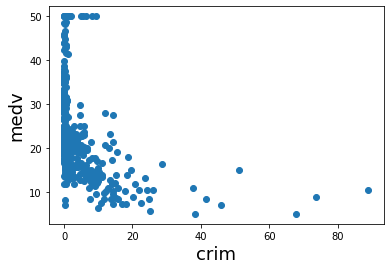

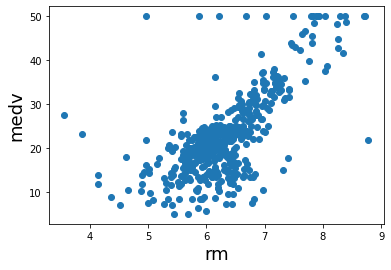

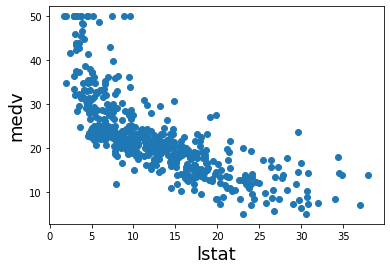

In [5]:
#观察各自变量与结果对应关系
for name in x1:
    x = data[name].values
    y = data['medv'].values
    plt.scatter(x,y)
    plt.xlabel(name,fontsize=18)
    plt.ylabel('medv',fontsize=18)
    plt.show()

In [6]:
y = data['medv'].values

In [7]:
#训练集测试集比例
split_num = int(len(features)*0.7)

In [8]:
#区分训练集和测试集
x_train = features[0:split_num]
x_test = features[split_num:]
y_train = y[0:split_num]
y_test = y[split_num:]
int(len(x_train))

354

In [15]:
#定义模型，训练并输出系数和截距
model = LinearRegression()
model.fit(x_train,y_train)
print("模型权重为：",model.coef_)
print("模型截距为：",model.intercept_)

模型权重为： [ 0.69979497 10.13564218 -0.20532653]
模型截距为： -38.00096988969029


In [10]:
y_predict = model.predict(x_test)
y_predict[0:5]

array([17.77439141, 21.09512448, 27.63412265, 26.78577951, 25.38313368])

In [11]:
#计算结果
error_mse = mean_squared_error(y_predict,y_test)
error_mae = mean_absolute_error(y_predict,y_test)
print("测试集的mse为：",error_mse)
print("测试集的mae为：",error_mae)

测试集的mse为： 303.8331247223632
测试集的mae为： 13.022063072780275
